In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/home/jeauscq/Desktop/jcq_thesis/force_dataset_final.csv", delimiter=",")
df2 = pd.read_csv("/home/jeauscq/Desktop/jcq_thesis/get_ee_dynamic_componentes_dataset_final.csv")

In [3]:
temp = []
for i in range(0, len(df2.iloc[1634, :])):
    float_list = [float(x) for x in df2.iloc[1634, i].split(';')]
    temp.append(float_list)
    

AttributeError: 'numpy.int64' object has no attribute 'split'

In [63]:
df2.iloc[0, 0]

'2.214022;0.035959;-0.492191;1.702200;-1.473000;-0.581750'

In [64]:
import numpy as np
temp = np.array(temp).reshape(-1,6)

In [65]:
temp[:,2]

array([1.185573, 1.182812, 1.180603, 1.178831, 1.177402, 1.176241,
       1.175289, 1.174499, 1.173835, 1.173269, 1.17278 , 1.172349,
       1.171964, 1.171615, 1.171292, 1.170991, 1.170705, 1.170431,
       1.170167, 1.169909, 1.169656, 1.169407, 1.16916 , 1.168914,
       1.168669, 1.169379, 1.17091 , 1.173199, 1.176238, 1.180059,
       1.184714, 1.190235, 1.196553, 1.203339, 1.209657, 1.216296,
       1.222378, 1.227611, 1.231967, 1.235521, 1.238383, 1.240666,
       1.24217 , 1.243019, 1.243293, 1.243033, 1.24223 , 1.240805,
       1.238557, 1.235056, 1.229402, 1.219721, 1.213997, 1.210325,
       1.207771, 1.205866, 1.204365, 1.203135, 1.201854, 1.200509,
       1.199099, 1.197639, 1.196178, 1.194843, 1.193952, 1.194247,
       1.19743 , 1.207347, 1.21057 , 1.210943, 1.210181, 1.209035,
       1.207823, 1.206669, 1.205614, 1.204664, 1.20381 , 1.203042,
       1.202345, 1.201709, 1.200743, 1.199479, 1.197929, 1.19608 ,
       1.193882, 1.191226, 1.187874, 1.183275, 1.176259, 1.164

In [95]:
# Define thresholds
FORCE_THRESHOLD = 300
TORQUE_THRESHOLD = 650  # define based on your system's range
COND_THRESHOLD = 300

In [96]:
# Detect anomalies
anomalies = df[df["force_norm"] > FORCE_THRESHOLD].copy()

In [97]:
# Classify cause
def classify(row):
    high_tau = row["torque_norm"] > TORQUE_THRESHOLD
    ill_cond = row["jacobian_condition"] > COND_THRESHOLD
    if high_tau and ill_cond:
        return "both"
    elif high_tau:
        return "high_tau"
    elif ill_cond:
        return "ill_conditioned"
    else:
        return "unknown"


In [98]:

anomalies["reason"] = anomalies.apply(classify, axis=1)
anomalies.to_csv("force_anomalies.csv", index=False)

print(f"Detected {len(anomalies)} anomalies.")
print(anomalies["reason"].value_counts())


Detected 5260 anomalies.
ill_conditioned    3616
unknown            1639
high_tau              5
Name: reason, dtype: int64


In [50]:
print(max(temp[1:,2]))

TypeError: list indices must be integers or slices, not tuple

In [79]:
forces = df["force_norm"].loc[df["traj_idx"] == 1634]

In [81]:
print(forces)

813732    0.258809
813733    0.202849
813734    0.152992
813735    0.109343
813736    0.072097
            ...   
814225    2.968389
814226    2.278021
814227    1.751144
814228    1.343576
814229    1.040746
Name: force_norm, Length: 498, dtype: float64


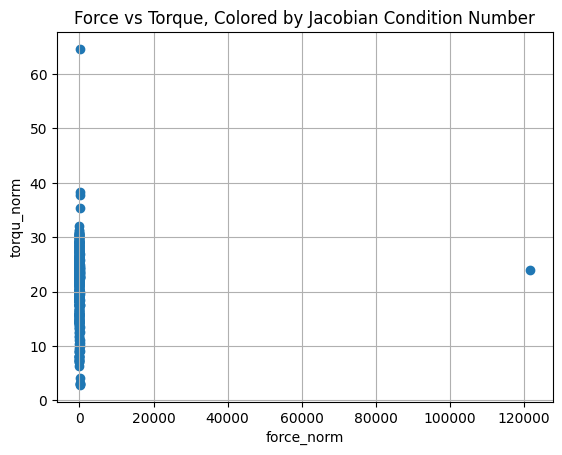

In [89]:
import matplotlib.pyplot as plt

plt.scatter(df["force_norm"].loc[df["traj_idx"] == 1634], df["torque_norm"].loc[df["traj_idx"] == 1634])
plt.xlabel("force_norm")
# plt.ylim(450, 500)
plt.ylabel("torqu_norm")
plt.title("Force vs Torque, Colored by Jacobian Condition Number")
plt.grid(True)
plt.show()


In [53]:
len(df["torque_norm"].loc[df["traj_idx"] == 0])

498

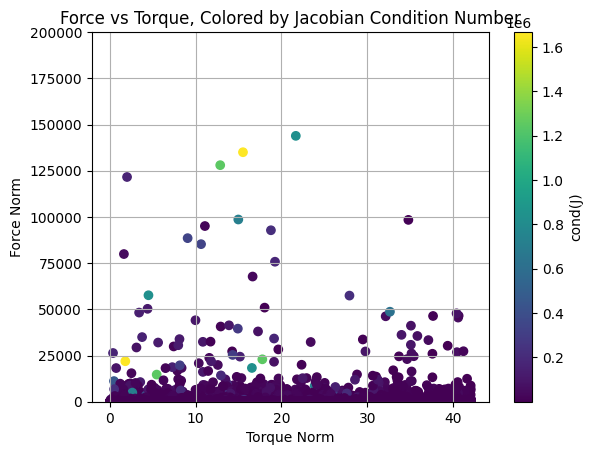

In [29]:
import matplotlib.pyplot as plt

plt.scatter(df["torque_norm"], df["force_norm"], c=df["jacobian_condition"], cmap="viridis")
plt.xlabel("Torque Norm")
plt.ylabel("Force Norm")
plt.ylim(0, 200000)
plt.title("Force vs Torque, Colored by Jacobian Condition Number")
plt.colorbar(label="cond(J)")
plt.grid(True)
plt.show()


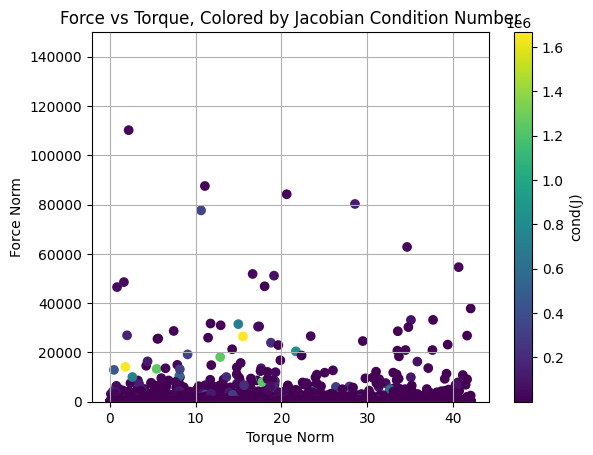

In [18]:
plt.scatter(df["torque_norm"], df["force_norm_M"], c=df["jacobian_condition"], cmap="viridis")
plt.xlabel("Torque Norm")
plt.ylabel("Force Norm")
plt.ylim(0, 150000)
plt.title("Force vs Torque, Colored by Jacobian Condition Number")
plt.colorbar(label="cond(J)")
plt.grid(True)
plt.show()

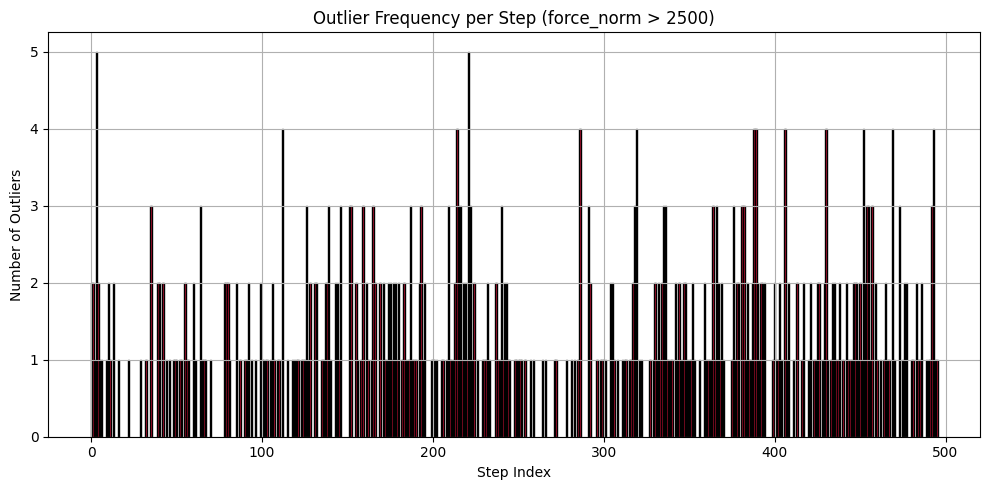

In [19]:
# Filter outliers
outliers = df[df["force_norm"] > 2500]

# Count how many per step
step_counts = outliers["step"].value_counts().sort_index()

# Plot histogram
plt.figure(figsize=(10, 5))
plt.bar(step_counts.index, step_counts.values, color='crimson', edgecolor='black')
plt.title("Outlier Frequency per Step (force_norm > 2500)")
plt.xlabel("Step Index")
plt.ylabel("Number of Outliers")
plt.grid(True)
plt.tight_layout()
plt.show()

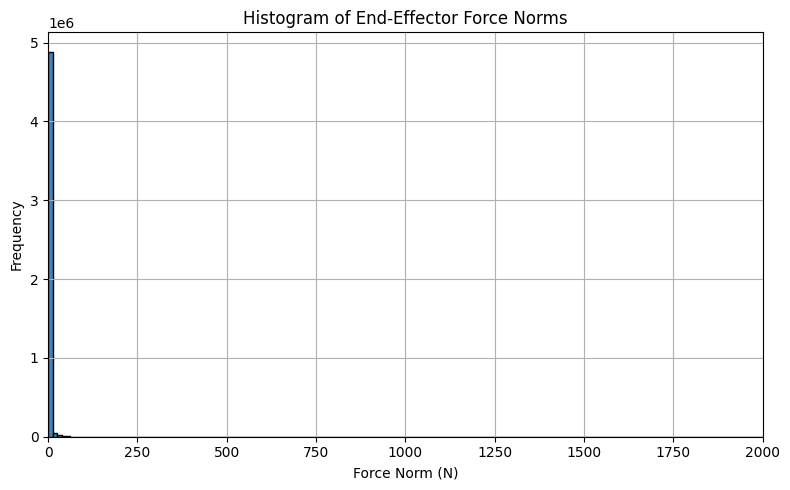

In [20]:
# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(df["force_norm_M"], bins=100000, color='steelblue', edgecolor='black')
plt.title("Histogram of End-Effector Force Norms")
plt.xlabel("Force Norm (N)")
plt.xlim(0, 2000)
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
# Extract force magnitudes
force_values = df["force_norm_M"]

# Basic statistics
print(f"Minimum force: {force_values.min():.4f} N")
print(f"Maximum force: {force_values.max():.4f} N")
print(f"Mean force: {force_values.mean():.4f} N")
print(f"Standard deviation: {force_values.std():.4f} N")
print(f"1st quartile (Q1): {force_values.quantile(0.25):.4f} N")
print(f"Median (Q2): {force_values.median():.4f} N")
print(f"3rd quartile (Q3): {force_values.quantile(0.75):.4f} N")

Minimum force: 0.0000 N
Maximum force: 1249882.7527 N
Mean force: 2.6683 N
Standard deviation: 606.8560 N
1st quartile (Q1): 0.0297 N
Median (Q2): 0.1103 N
3rd quartile (Q3): 0.5481 N


In [22]:
# Extract force magnitudes
force_values = df["force_norm"]

# Basic statistics
print(f"Minimum force: {force_values.min():.4f} N")
print(f"Maximum force: {force_values.max():.4f} N")
print(f"Mean force: {force_values.mean():.4f} N")
print(f"Standard deviation: {force_values.std():.4f} N")
print(f"1st quartile (Q1): {force_values.quantile(0.25):.4f} N")
print(f"Median (Q2): {force_values.median():.4f} N")
print(f"3rd quartile (Q3): {force_values.quantile(0.75):.4f} N")

Minimum force: 0.0000 N
Maximum force: 1381460.9035 N
Mean force: 5.0861 N
Standard deviation: 655.1854 N
1st quartile (Q1): 0.1079 N
Median (Q2): 0.4045 N
3rd quartile (Q3): 2.1244 N


In [23]:
count_above_trh= (force_values > 60).sum()
print(f"Number of force values > 60 N: {count_above_trh}")
print(f"Percentage of exceeding forces: {count_above_trh*100/(499*10000)}")


Number of force values > 60 N: 36519
Percentage of exceeding forces: 0.7318436873747495


In [24]:
# Filter rows where force > 2000
high_force = df[df["force_norm"] > 5000]

# Count how many per trajectory
high_force_counts = high_force["traj_idx"].value_counts()

# Find the trajectory with the most
if not high_force_counts.empty:
    worst_traj = high_force_counts.idxmax()
    worst_count = high_force_counts.max()
    print(f"Trajectory {worst_traj} has the most values > 5000 N: {worst_count}")
else:
    print("No force values exceed 5000 N in any trajectory.")


Trajectory 7378 has the most values > 5000 N: 16


In [11]:
import csv

def convert_dataset_format(input_file, output_file):
    with open(input_file, "r") as f_in, open(output_file, "w", newline="") as f_out:
        reader = csv.reader(f_in)
        writer = csv.writer(f_out)

        for row in reader:
            # Check if it's already in grouped format
            if ";" in row[0]:
                writer.writerow(row)
                continue

            try:
                # Flatten into a list of floats
                flat_data = [float(x) for x in row]

                # Group into pos1;pos2;vel1;vel2
                grouped = []
                for i in range(0, len(flat_data), 2):
                    block = flat_data[i:i+2]
                    grouped.append(";".join(f"{v:.6f}" for v in block))

                writer.writerow(grouped)

            except Exception as e:
                print(f"[WARNING] Skipping invalid row: {row} ({str(e)})")


# Example usage
convert_dataset_format("/home/jeauscq/Desktop/jcq_thesis/datasets/Policy/MPC/torque_Const/mpc_generated_tor_constraint_actions.csv", "/home/jeauscq/Desktop/jcq_thesis/datasets/Policy/MPC/torque_Const/mpc_generated_tor_constraint_actions_fixed.csv")